In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
X_train = pd.read_table('train.feature.txt', header=None)
y_train = pd.read_table('train.txt', header=None)
X_valid = pd.read_table('valid.feature.txt', header=None)
y_valid = pd.read_table('valid.txt', header=None)
X_test = pd.read_table('test.feature.txt', header=None)
y_test = pd.read_table('test.txt', header=None)

In [3]:
train_acc = []
valid_acc = []
test_acc = []
para = [32,64,128]

le = LabelEncoder()
le = le.fit(y_train[0])
y_train = le.transform(y_train[0])
y_valid = le.transform(y_valid[0])
y_test = le.transform(y_test[0])

for p in para:
    clf = RandomForestClassifier(max_depth=p, random_state=0)
    clf.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train,clf.predict(X_train)))
    valid_acc.append(accuracy_score(y_valid,clf.predict(X_valid)))
    test_acc.append(accuracy_score(y_test,clf.predict(X_test)))

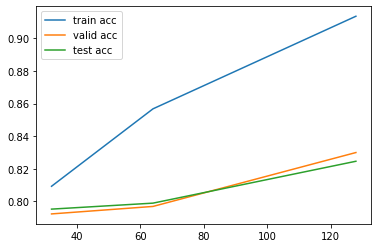

In [4]:
plt.plot(para, train_acc, label='train acc')
plt.plot(para, valid_acc, label='valid acc')
plt.plot(para, test_acc, label='test acc')
plt.legend()
plt.show()